In [4]:
import aiohttp, json, pandas, geopandas
import matplotlib.pyplot as plt
import glymur
import numpy
from os import environ
import descartes
from io import BytesIO
from fastkml import kml
from glob import glob

In [2]:
%matplotlib inline

In [3]:
COLORS = ["#EDE7D8", "#80726F", "#F2F2F2", "#84B1C6",    "#86B59F", "#666666", "#000000"]

In [6]:
turkey_borders = "https://raw.githubusercontent.com/cihadturhan/tr-geojson/master/geo/tr-cities-utf8.json"
base_url = "https://raw.githubusercontent.com/mgurdal/marble-growth/master/marble_deposit_locations"
deposits = [{
        "name": "Beige",
        "url": F"{base_url}/beige_marble.geojson",
    },
    {
        "name": "White",
        "url": F"{base_url}/white_marble.geojson",
    },
    {
        "name": "Colored",
        "url": F"{base_url}/colored_marble.geojson",
    },
    {
        "name": "Black",
        "url": F"{base_url}/black_marble.geojson",
    },
    {
        "name": "Travertine",
        "url": F"{base_url}/travertine_marble.geojson",
    },
    {
        "name": "Onyx",
        "url": F"{base_url}/onyx_marble.geojson",
    }]

In [5]:
async with aiohttp.ClientSession() as better_than_requests:

    gdf = None
    dataset = {"type": "FeatureCollection", "features": []}
    for deposit in deposits:
        resp = await better_than_requests.get(deposit["url"])
        if resp.status != 200:
            print(resp.reason)
        features = json.loads(await resp.text(), encoding="ISO-8859-15")

        dataset["features"] += [
            {
                **feature,
                "properties": {
                    **feature["properties"],
                    "type": deposit["name"]
                }
            } for feature in features["features"]
        ]

    gdf = geopandas.GeoDataFrame.from_features(dataset)
    gdf.rename(columns={"name": "owner"}, inplace=True)

    resp = await better_than_requests.get(turkey_borders)
    turkey_geojson = json.loads(await resp.text())
    turkey = geopandas.GeoDataFrame.from_features(turkey_geojson)

In [7]:
ax = turkey.plot(color="#D1D1D1", figsize=(19, 6), alpha=0.5, edgecolor='k')
plt.suptitle('Turkey Marble Deposit Diversion')
gdf.plot(cmap="Oranges", ax=ax)


NameError: name 'turkey' is not defined

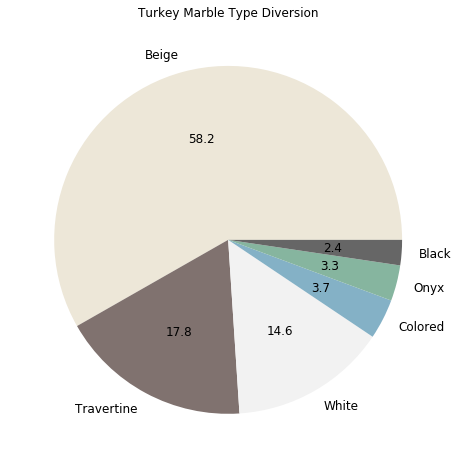

In [7]:
_ = gdf["type"].value_counts().plot.pie(
    autopct="%.1f",
    colors=COLORS,
    figsize=(8, 8),
    labels=gdf["type"].value_counts().index,
    fontsize=12,
    title="Turkey Marble Type Diversion",
    x=None
)
x_axis = _.yaxis.set_label_text('')